In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
Data = pd.read_csv('train.csv')
Data_test = pd.read_csv('Test.csv')

# Data preprocessing

In [89]:
#Seperating the numerical and categorical feature
numerical_features = []
categorical_features = []
categorical_features  = Data.select_dtypes(include = 'object').columns
numerical_features = Data.select_dtypes(exclude = 'object').columns

In [92]:
# checking there are any duplicate records or not
len(Data['Id']) == len(set(Data['Id']))

True

In [93]:
Data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [94]:
Data_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [99]:
Data.shape,Data_test.shape

((1460, 81), (1459, 80))

# Underastanding the target variable

#Handling the missing data 

In [103]:
from scipy.stats import norm,skew

In [107]:
(mu,sigma) = norm.fit(Data['SalePrice'])

mean: 180921.20, standarddeviation : 79415.29


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Sales price distribution')

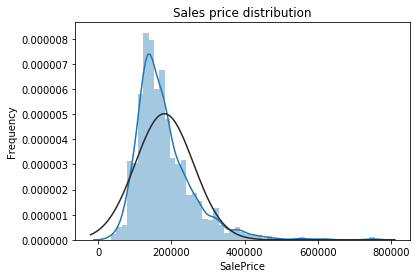

In [112]:
print("mean: {:.2f}, standarddeviation : {:.2f}".format(mu,sigma))
sns.distplot(Data['SalePrice'], fit = norm)
plt.ylabel('Frequency')
plt.title('Sales price distribution')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


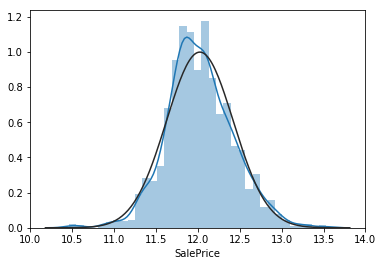

In [115]:
sns.distplot(np.log1p(Data['SalePrice']), fit = norm)

In [117]:
Y = np.log1p(Data['SalePrice'])

In [118]:
na_features = []
for clm in Data.columns:
    na_count = sum(Data[clm].isna())
    if na_count > 0.8*(Data.shape[0]):
        na_features.append(clm)
na_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [119]:
# dropping the feature which have hihger nas
Data.drop(na_features, axis = 'columns',inplace = True)        
Data.drop('Id', axis = 'columns',inplace = True) 

In [120]:
# Filling the na with mean value
na_features_1 = []
for clm in Data.columns:
    na_count = sum(Data[clm].isna())
    if na_count > 0:
        na_features_1.append(clm)
na_features_1

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [124]:
for i in na_features_1:
    if i in categorical_features:
        mode = Data[i].mode()
        Data[i].fillna(mode[0], inplace = True)
    else:
        mean = Data[i].mean()
        Data[i].fillna(mean, inplace = True)

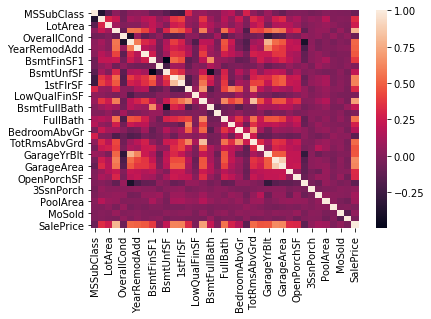

In [125]:
# Finding the correlation among the features
corr = Data.corr()
sns.heatmap(corr)

In [126]:
numerical_features = []
categorical_features = []
categorical_features  = Data.select_dtypes(include = 'object').columns
numerical_features = Data.select_dtypes(exclude = 'object').columns

We can see that there are barely no corellations among the different feature

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [128]:
# label encoding the categorical features
for cf in categorical_features:
    Data[cf] = le.fit_transform(Data[cf])

In [129]:
# one hot encoding
Data = pd.get_dummies(Data, columns = categorical_features)

In [130]:
X = Data.iloc[:,:275]

In [131]:
from sklearn.cross_validation import train_test_split

# Model building

In [150]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [151]:
X_train.shape

(1022, 275)

In [152]:
X_test.shape

(438, 275)

In [153]:
Y_train.shape

(1022,)

In [154]:
Y_test.shape

(438,)

In [137]:
# linear regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [138]:
lr = LinearRegression()
model = lr.fit(X_train, Y_train)

In [145]:
y_predict = model.predict(X_train)

In [155]:
np.sqrt(mean_squared_error(Y_train,y_predict))

0.060815732846999426

# Implementing the cross vlaidation

In [168]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [169]:
kf = KFold(5,shuffle = True , random_state = 45)

In [175]:
np.sqrt(-cross_val_score(lr,X_test,Y_test,scoring = 'neg_mean_squared_error',cv =kf )).mean()

2.1760250351894976

In [176]:
np.sqrt(-cross_val_score(lr,X_train,Y_train,scoring = 'neg_mean_squared_error',cv =kf )).mean()

0.10725236318492633

# we can see the see the overfitting in the model 